In [19]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt


In [15]:

#reading the acs5 census 2010 dataset (using 2012) and dec 2010
acs_2012 = pd.read_parquet('/n/dominici_nsaph_l3/Lab/projects/analytic/census_acs5/census_2012.parquet')
acs_2012 = acs_2012[['zcta', 'hispanic']]
dec_2010 = pd.read_parquet('/n/dominici_nsaph_l3/Lab/data_processing/census_acs5/nishtha_old/data/output/census_dec/dec_census_2010.parquet')

In [18]:
#merge both the files 
merged = pd.merge(acs_2012, dec_2010, how='outer', on='zcta', suffixes=['_acs', '_dec'])
merged['diff'] = merged['hispanic_acs']-merged['hispanic_dec']
merged.head()

,zcta,hispanic_acs,hispanic_dec,diff
0,01105,0.620624,0.625587,-0.004963
1,01106,0.036014,0.023532,0.012483
2,01107,0.780796,0.785807,-0.005010
3,01108,0.415036,0.390025,0.025010
4,01109,0.363636,0.339306,0.024331


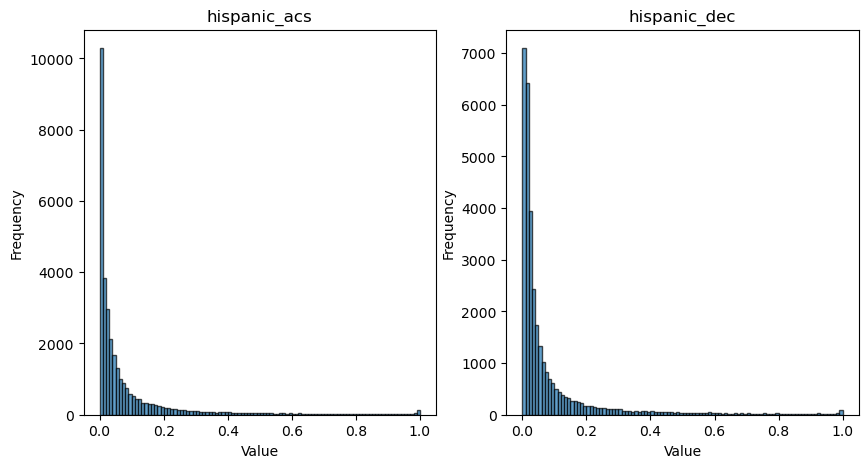

In [27]:
#Plotting the differences and the columns
num_rows = 1
num_cols = 2

# Create a grid of plots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(num_cols * 5, num_rows * 5))

for col, col_name in enumerate(list(merged.columns)[1:3]):
    ax = axes[col]
    ax.hist(merged[col_name], bins=100, edgecolor='black', alpha=0.7)
    ax.set_title(f'{col_name}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')


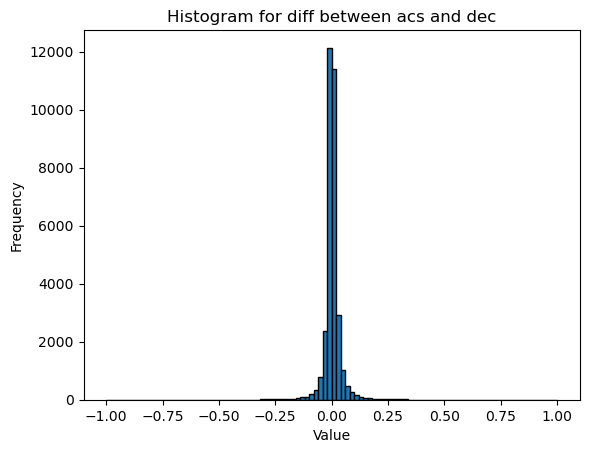

In [28]:
merged['diff'].plot.hist(bins=100, edgecolor="black")  # "bins" controls the number of bins in the histogram
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram for diff between acs and dec")
plt.show()